# Datavisualisatie

@author: Jan Verwaeren - Arne Deloose

@course: *Machine learning: van theorie tot praktijk*

Dit notebook bevat enkele illustraties van datavisualisatie in Python. In het eerste deel worden een aantal voorbeelden gegeven. In het tweede deel staan de oefeningen die aangevuld kunnen worden worden.

In deze sessie wordt (beperkt) gebruikgemaakt van de visualisatiemodule `matplotlib`. Dit is een zeer populaire low-level plotting library en is de basis voor meer high-level interfaces, zoals `plotnine` of `seaborne`. De high-level libraries zijn vaak gebruiksvrindelijker dan `matplotlib` en daarom zullen we voornamelijk deze gaan gebruiken in deze sessie, en in het bijzonder `plotnine` (een Python-implementatie van de Layered Grammar of Graphics, bekend van GGPLOT in R).


## 1. Importeren van modules

In [2]:
#importeer 
import pandas as pd               # pandas voor gebruik van de dataframe datastructuur
import numpy as np                # numpy voor implementatie van homogene arrays (matrices)
import matplotlib.pyplot as plt   # low-level plotting
import plotnine                   # high-level plotting
from plotnine import *
from plotnine.data import *       # voorbeeld datasets inladen

## 2. Illustraties van matplotlib

Hieronder volgt een illustratie van het gebruik van matplotlib voor het maken van een scatter plot en een histogram. Voor beide wordt iris-dataset gebruikt.

In [3]:
# inlezen data
url='https://raw.githubusercontent.com/ArneDeloose/Ugain_MachineLearning_DataVis/main/iris.csv'

df = pd.read_csv(url, sep = ";")
df.head()

,sepal length,sepal width,petal length,petal width,soort
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Is er een verband tussen de lengte van de sepalen en de petalen?**

Hieronder volgt een scatter plot die illustreert dat er inderdaad een verband aanwezig is.

Text(0, 0.5, 'Sepal Width')

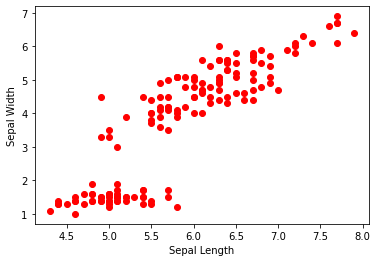

In [4]:
plt.scatter(x = df["sepal length"],    # variabele x-as
            y = df["petal length"],    # variabele y-as
            c = "r")                   # kleur van markers
plt.xlabel("Sepal Length")             # benoemen x- en y-as
plt.ylabel("Sepal Width")

**Bepaal de frequentieverdeling van de lengte van de sepalen**

Hieronder volgt een histogram.

Text(0.5, 0, 'Sepal Length')

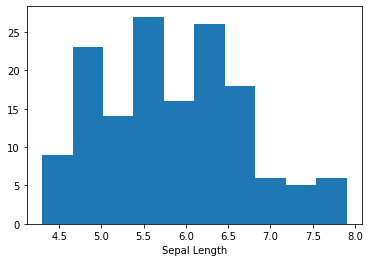

In [5]:
plt.hist(df["sepal length"])
plt.xlabel("Sepal Length")

## 3. Illustraties van ggplot/plotnine

Meer complexe plots dan de bovenstaande vergen al snel een aantal minder intuitieve manipulaties, wat leidt tot onoverzichtelijke broncode die bovendien moeilijker aan te passen is. Hierna gebruiken we `plotnine` als een meer high-level altnatief.

**Is er een verband tussen de lengte van de sepalen en de petalen?**

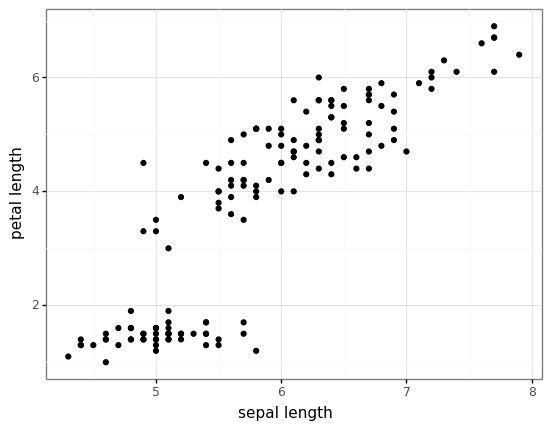

<ggplot: (-9223371899784852828)>

In [6]:
ggplot(df, aes(x = "sepal length", y = "petal length")) + \
   geom_point() +\
   theme_bw()

**Bepaal de frequentieverdeling van de lengte van de sepalen**

C:\Users\adloose\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 8'. Pick better value with 'binwidth'.


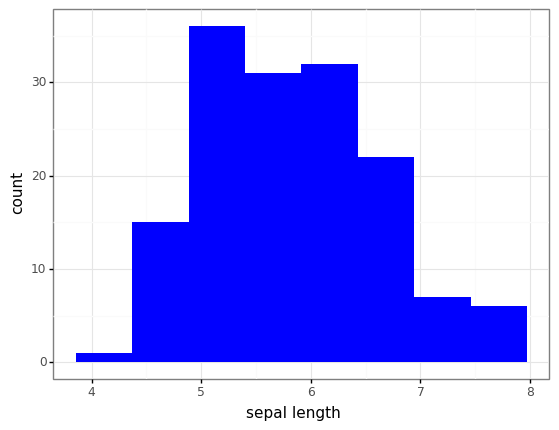

<ggplot: (-9223371899784791336)>

In [7]:
ggplot(df, aes(x = "sepal length")) +\
    geom_histogram(fill = "blue") +\
    theme_bw()

**Wat is de invloed van de soort op de breedte van de sepalen?**

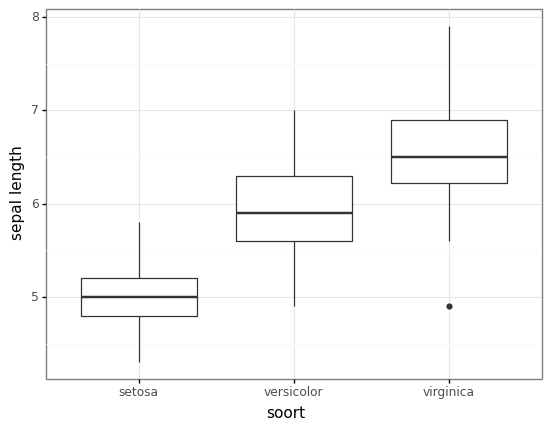

<ggplot: (-9223371899784739692)>

In [8]:
ggplot(df, aes(y = "sepal length", x = "soort")) +\
   geom_boxplot() +\
   theme_bw()

**Kan men op basis van de Sepal length en Sepal width de soorten onderscheiden van elkaar?**

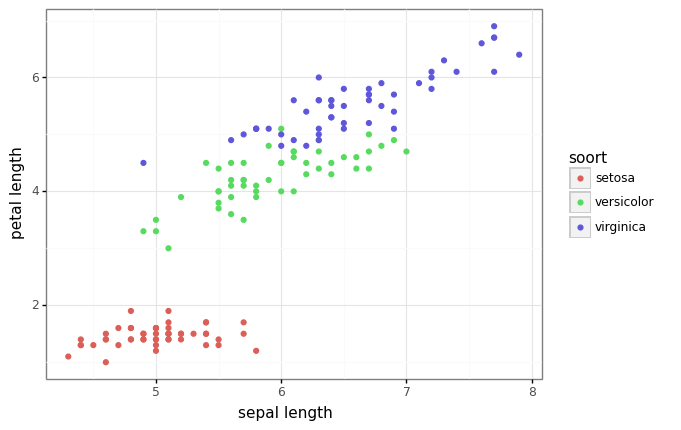

<ggplot: (-9223371899784690948)>

In [9]:
ggplot(df, aes(x = "sepal length",
               y = "petal length",
               color = "soort")) + \
   geom_point() +\
   theme_bw()

**Is het verband tussen sepalen en petalen hetzelfde voor de drie soorten?**

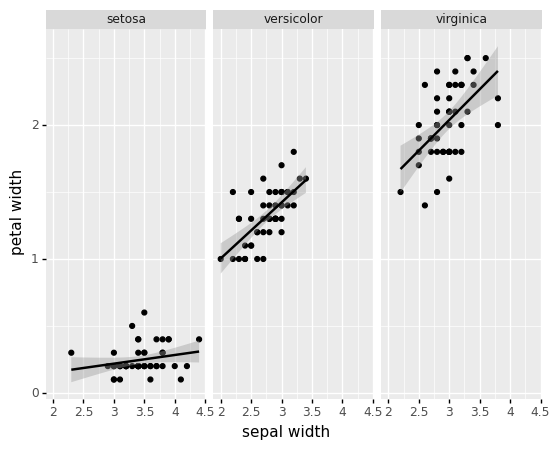

<ggplot: (-9223371899784924528)>

In [10]:
ggplot(df, aes(x = "sepal width",
               y = "petal width")) +\
   geom_point() +\
   geom_smooth(method = "lm") +\
   facet_wrap("soort")

## 4. Oefeningen

In deze oefeningensessie werken we met de `msleep`. Deze dataset bevat gegevens over het
slaappatroon van 83 dieren. 

Deze dataset maakt deel uit van de `plotnine` module als Pandas dataframe en hoeft dus niet ingelezen te worden. Hieronder wordt een deel van deze dataset getoond.

In [11]:
msleep.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000


**1.1. Maak een histogram voor totale slaap. Gebruik 10 bins en kleur de grafiek donkerblauw
(darkblue).**

OPMERKING: veel van de code die je hieronder nodig hebt kan je kopiëren uit de bovenstaande voorbeelden. Informatie over opties die hiervoor niet besproken werden kan je eenvoudig terugvinden dmv een zoekterm die `plotnine` of `ggplot` bevat samen met de naam van de eigenschap waarnaar je op zoek bent.

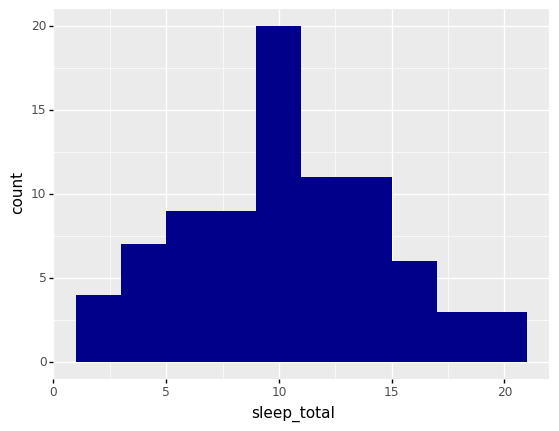

<ggplot: (-9223371899784087612)>

In [12]:
ggplot(msleep, aes(x = 'sleep_total')) +\
       geom_histogram(bins = 10, 
                      fill = "darkblue")


**1.2. Maak een boxplot voor rem slaap per type *voor* (omnivoor, carnivoor, insectivoor, herbivoor). Kleur de boxplot donkergrijs (darkgrey).**

C:\Users\adloose\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_boxplot : Removed 22 rows containing non-finite values.


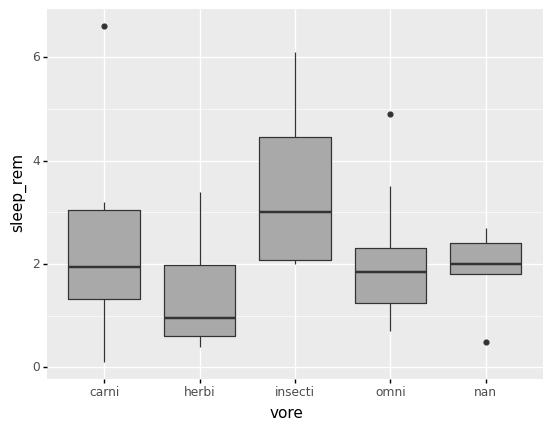

<ggplot: (-9223371899784181020)>

In [13]:
ggplot(msleep, aes(x = 'vore',
                   y = 'sleep_rem')) +\
    geom_boxplot(fill = "darkgrey")


**1.3. Maak een scatter plot van het aantal uren remslaap en het totaal aantal uren slaap per *voor* groep. Stijgt de hoeveelheid remslaap op dezelfde manier met het totale aantal uren slaap voor elke groep?**

C:\Users\adloose\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 22 rows containing missing values.


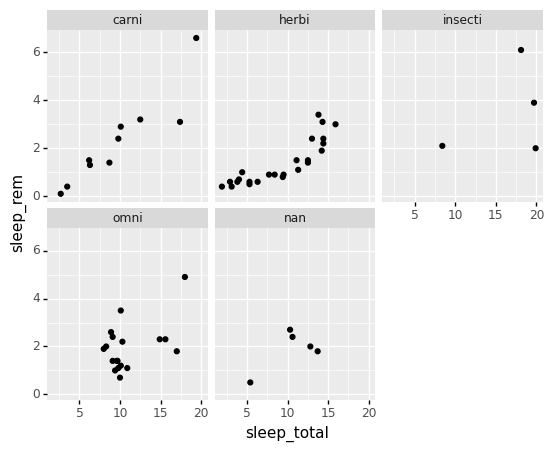

<ggplot: (-9223371899784156304)>

In [14]:
ggplot(msleep, aes(y = 'sleep_rem',
                   x = 'sleep_total')) +\
  geom_point() +\
  facet_wrap('vore')


**1.4.: EXTRA - GEBRUIK HET WWW:  De `mtcars` dataset bevat informatie over verschillende wagens.**

Enkele variabelen (van belang voor deze oefening) zijn:
- mpg: miles per gallon (verbruik aan benzine)
- cyl: het aantal cilinders
- am: manuele (1) of automatische (0) versnellingsbak

Gebruik deze informatie om de volgende plot na te maken, die voor elke combinatie van `cyl` en `carb` de gemiddelde `mpg` toont als een barplot (en optioneel alsook een foutenvlag op dit gemiddelde).

C:\Users\adloose\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``PIL.Image.open(urllib.request.urlopen(url))``.


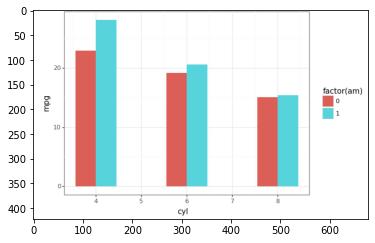

In [15]:
url_fig='https://raw.githubusercontent.com/ArneDeloose/Ugain_MachineLearning_DataVis/main/mtcars_plot.PNG'

a = plt.imread(url_fig)
plt.imshow(a)
plt.show()

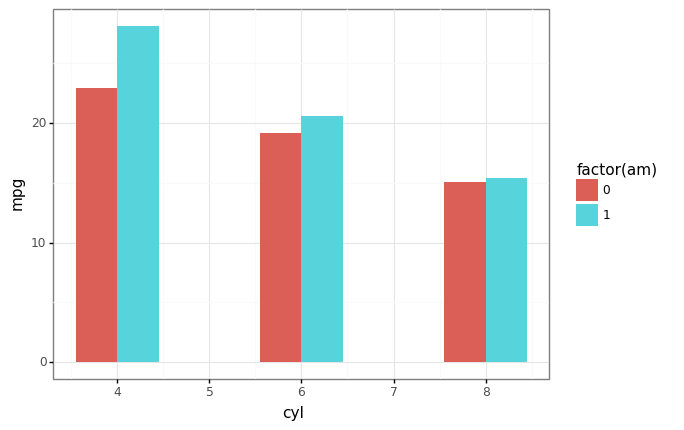

<ggplot: (-9223371899783886196)>

In [16]:
mtcars.head()
ggplot(mtcars, aes(x = "cyl", 
                   y = "mpg", 
                   fill = "factor(am)")) +\
   stat_summary(fun_y = np.mean,
                geom = "bar",
                position = "dodge") +\
   theme_bw()